# Part 1: Data preprocessing

<!-- Dataset link: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv -->

## Importing the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset = pd.read_csv('CarDekho_Car_Price_Prediction_Dataset.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data exploration

In [4]:
dataset.shape

(301, 9)

In [5]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# categorical columns
dataset.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [8]:
len(dataset.select_dtypes(include='object').columns)

4

In [9]:
# numerical columns
dataset.select_dtypes(include=['float64', 'int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [10]:
len(dataset.select_dtypes(include=['float64', 'int64']).columns)

5

In [11]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with missing values

In [12]:
dataset.isnull().values.any()

False

In [13]:
dataset.isnull().values.sum()

0

## Restructure the dataset

In [14]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
dataset = dataset.drop(columns='Car_Name')

In [16]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
# add a column
dataset['Current Year'] = 2023

In [18]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [19]:
dataset['Years Old'] = dataset['Current Year'] - dataset['Year']

In [20]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Years Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [21]:
dataset = dataset.drop(columns=['Current Year', 'Year'])

In [22]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## Encoding the categorical data

In [23]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [24]:
len(dataset.select_dtypes(include='object').columns)

3

In [25]:
dataset['Fuel_Type'].nunique()

3

In [26]:
dataset['Seller_Type'].nunique()

2

In [27]:
dataset['Transmission'].nunique()

2

In [28]:
dataset.shape

(301, 8)

In [29]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [30]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [31]:
dataset.shape

(301, 9)

## Correlation matrix

In [32]:
dataset_2 = dataset.drop(columns='Selling_Price')

<Axes: title={'center': 'Correlated with Selling Price'}>

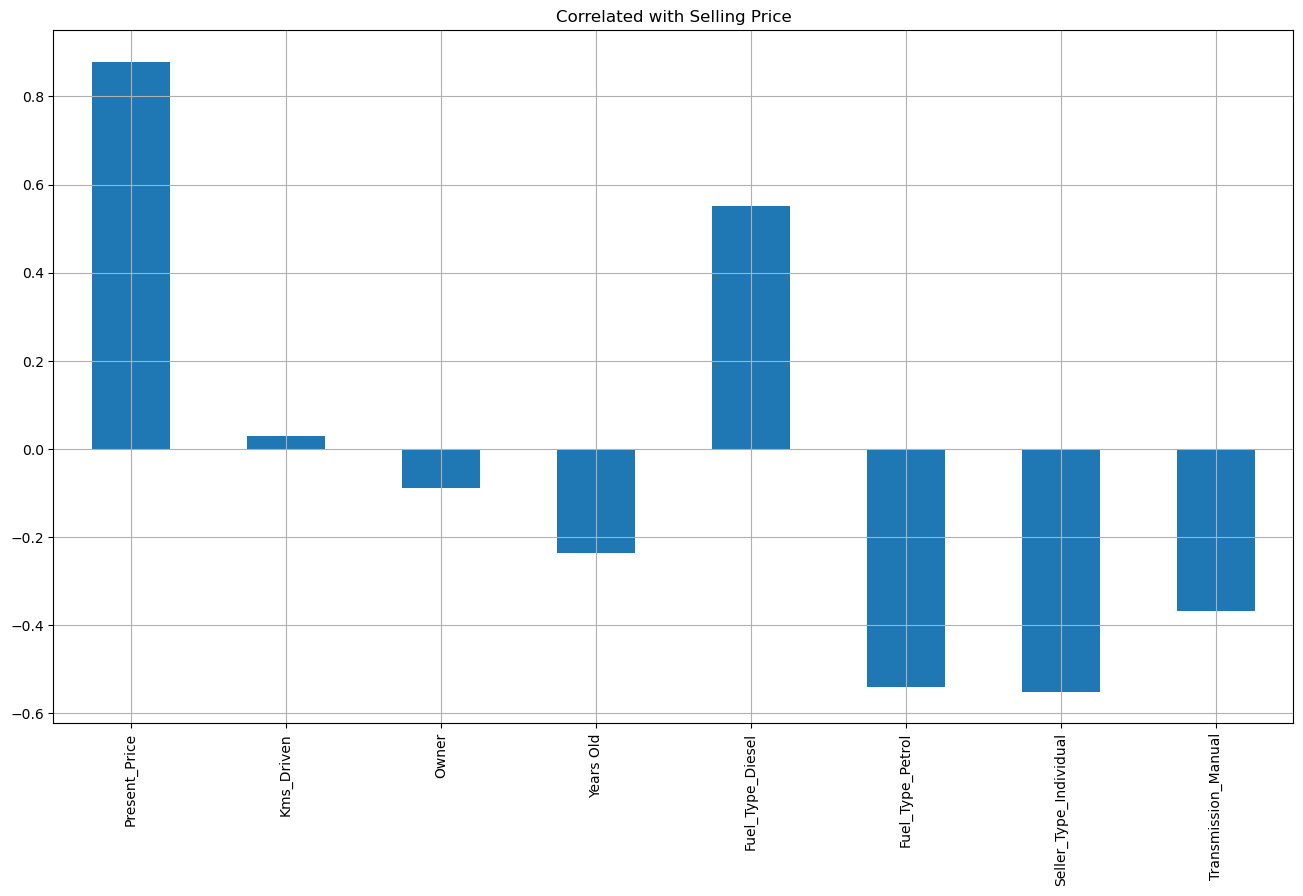

In [33]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
    figsize=(16,9), title='Correlated with Selling Price', grid=True
)

In [34]:
corr = dataset.corr()

<Axes: >

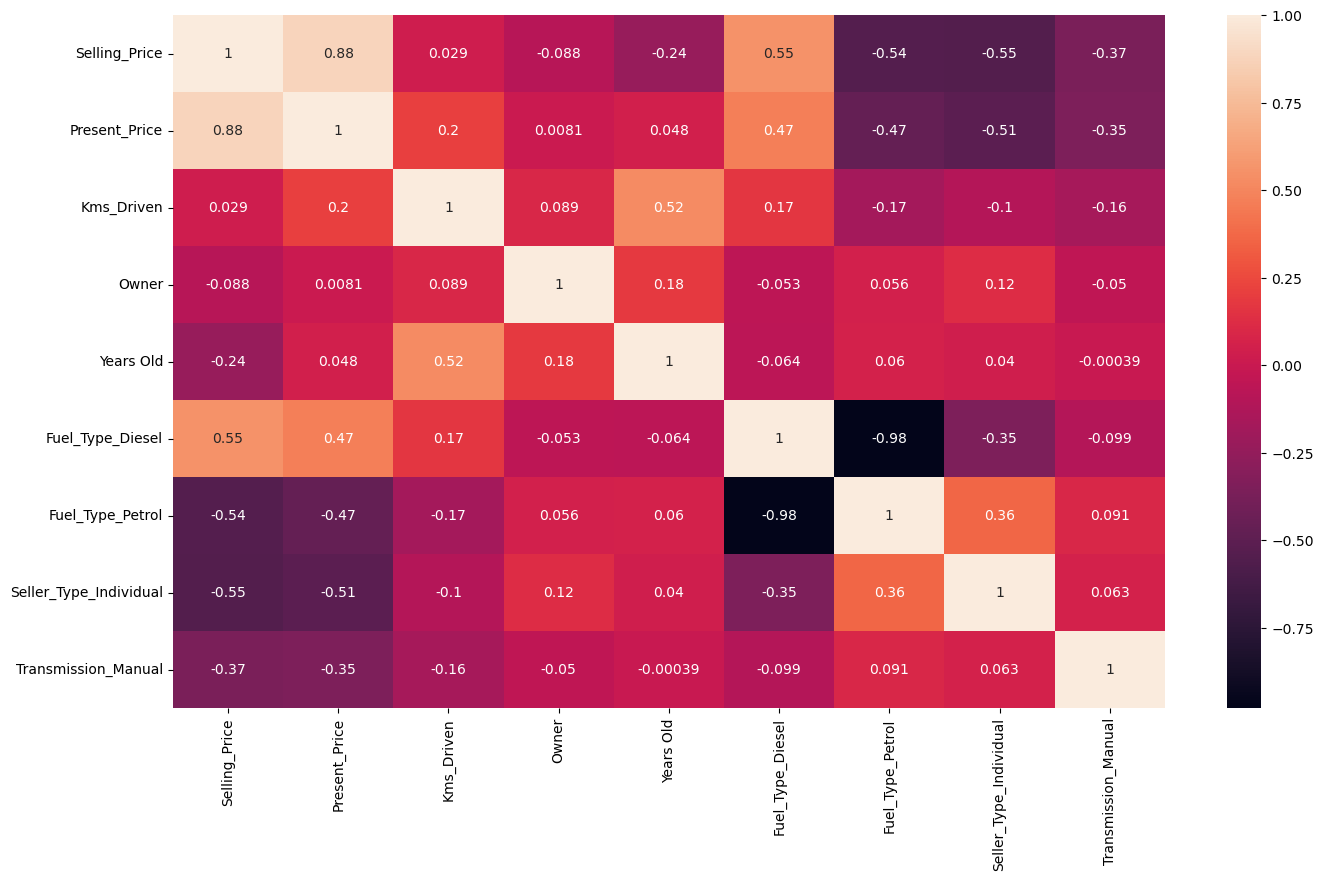

In [35]:
# heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

## Splitting the dataset

In [36]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [37]:
# matrix of features
x = dataset.drop(columns='Selling_Price')

In [38]:
# target variable
y = dataset['Selling_Price']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
x_train.shape

(240, 8)

In [41]:
y_train.shape

(240,)

In [42]:
x_test.shape

(61, 8)

In [43]:
y_test.shape

(61,)

## Feature scaling

feature scaling is not applied for this specific business problem



---



# Part 2: Building the model

## 1-: Linear Regression Algoritham

In [83]:
# Initialize Linear Regression model
regressor_mlr = LinearRegression()

# Train the model
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [88]:
# Predict on test set
regressor_mlr.predict(x_test)

array([ 7.51749959, -0.38136   ,  4.2559471 ,  9.00719207, 14.4269339 ,
        4.87144495,  3.50800415,  1.44729345,  5.3451756 ,  4.61435641,
        2.26758534,  1.6209573 ,  5.0502457 ,  7.5592941 ,  8.60637169,
       13.98391877,  7.32792948,  4.23074458, -0.43329109,  2.36959252,
        4.98862734,  3.82566592,  6.43249291,  8.02059313, -1.89494718,
        1.92952344, -0.82194725,  0.82000278,  0.0287008 ,  7.09763522,
        3.56594643,  7.42982762,  0.72122573,  7.93570184,  3.51526022,
        1.8051379 ,  5.54534144,  6.9878273 , -2.62961763,  9.08622868,
        9.21468651, 20.02249841,  4.37997532,  3.85349481,  6.66353853,
        9.8481939 ,  0.13251979,  1.68098927,  5.0992548 ,  7.35232556,
        8.07177253,  4.17227139,  4.84915569, 20.36876087,  1.7479962 ,
        1.30291959,  0.30682078,  1.98321103,  3.37503799,  0.87901548,
        3.52730876])

In [89]:
# Predict on test set
y_pred = regressor_mlr.predict(x_test)

In [90]:
# Calculate R-squared score
r2_score(y_test, y_pred)

0.9144342972228521

In [ ]:
Linear_Regression_Score = r2_score(y_test, y_pred)

## 2-: Multiple linear Regression Algoritham

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = regressor_mlr.predict(x_test)

In [57]:
r2_score(y_test, y_pred)

0.9144342972228521

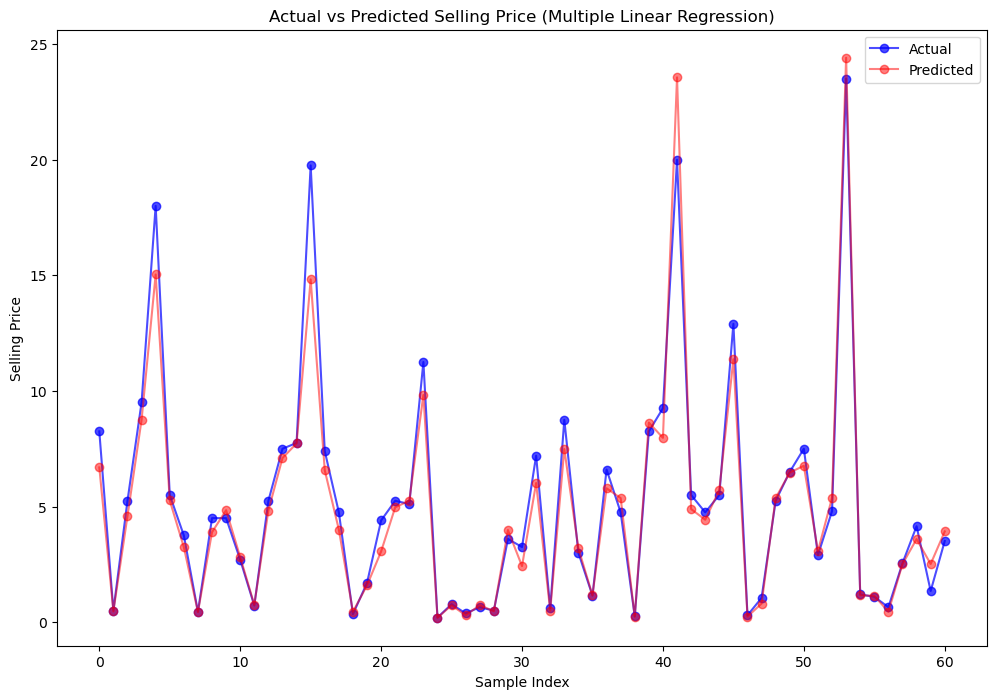

In [82]:
# Plot actual vs predicted values with line plot
plt.figure(figsize=(12, 8))

# Plotting actual values
plt.plot(y_test.values, marker='o', linestyle='-', color='blue', alpha=0.7, label='Actual')

# Plotting predicted values
plt.plot(y_pred, marker='o', linestyle='-', color='red', alpha=0.5, label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Selling Price')
plt.title('Actual vs Predicted Selling Price (Multiple Linear Regression)')
plt.legend()
plt.show()



---


## 3-: Random Forest Regressor

In [70]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [71]:
y_pred = regressor_rf.predict(x_test)

In [72]:
r2_score(y_test, y_pred)

0.9553445224813187

In [ ]:
Random_Forest_Score = r2_score(y_test, y_pred)

In [73]:
# Predict on test set
y_pred = regressor_rf.predict(x_test)

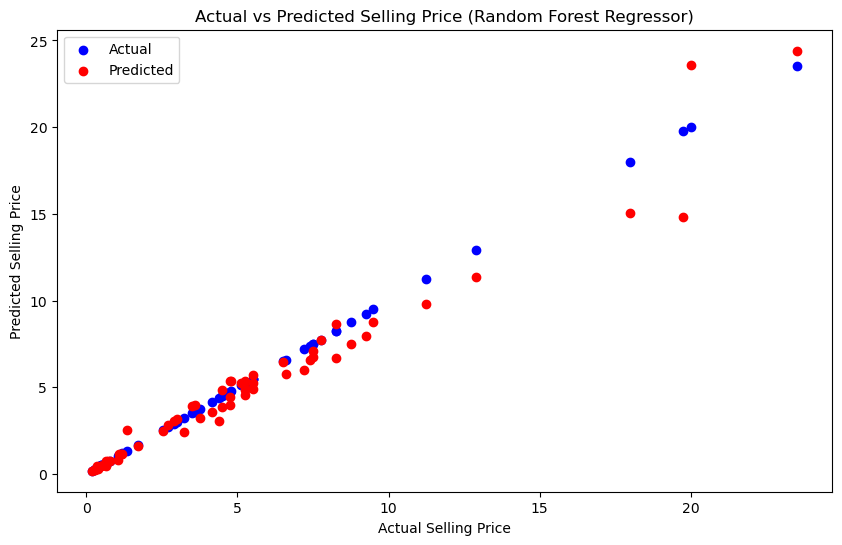

In [79]:
# Plot actual vs predicted values with different colors
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(y_test, y_test, color='blue', label='Actual')

# Plot predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted')

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Random Forest Regressor)')
plt.legend()
plt.show()

## 4-: Decesion Tree Algoritham

In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
regressor_dt = DecisionTreeRegressor(random_state=0)

# Train the model
regressor_dt.fit(x_train, y_train)

# Predict on test set
y_pred = regressor_dt.predict(x_test)

# Calculate evaluation metrics

In [171]:
r2_score(y_test, y_pred)

0.9408931002601251

In [172]:
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [173]:
# Display results
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.9409
Mean Absolute Error: 0.7084
Mean Squared Error: 1.4941
Root Mean Squared Error: 1.2223


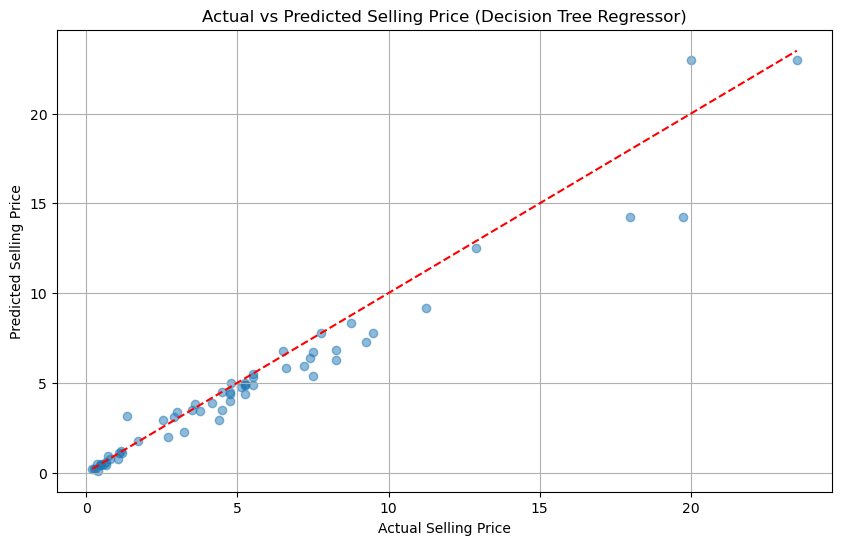

In [175]:
# Optionally, you can plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Decision Tree Regressor)')
plt.grid(True)
plt.show()



---


## Part 3: Fing the optimal parameters using RandomizedSearchCV

In [152]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error'],  # Corrected criteria
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', 1.0]  # Include 1.0 explicitly
}

# Create the RandomForestRegressor
regressor_rf = RandomForestRegressor(max_features=1.0)

In [153]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['auto', 'sqrt', 'log2', 1.0]}

In [154]:
# Setup RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=regressor_rf,
    param_distributions=parameters,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [155]:
# Fit the model
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         1.0],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [156]:
random_cv.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=40,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=1000)

In [157]:
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 1.0,
 'max_depth': 40,
 'criterion': 'absolute_error'}



---


# Part 4: Final model (Random Forest)

In [158]:
# regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=None, max_features='auto', max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=100, n_jobs=None, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)
# regressor.fit(x_train, y_train)

# Initialize the model with the updated max_features parameter
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                                  max_depth=None, max_features=1.0, max_leaf_nodes=None,
                                  max_samples=None, min_impurity_decrease=0.0,
                                  min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
                                  n_estimators=100, n_jobs=None, oob_score=False,
                                  random_state=None, verbose=0, warm_start=False)

# Fit the model
regressor.fit(x_train, y_train)

# Predict on the test set
y_pred = regressor.predict(x_test)

In [159]:
y_pred = regressor.predict(x_test)

In [160]:
r2_score(y_test, y_pred)

0.9610636744940263



---


# Part 5: Predicting a Single Observation

In [91]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [96]:
import pandas as pd

# Assuming these are the column names from your dataset
column_names = [
    'Present_Price', 'Kms_Driven', 'Owner', 'Years Old', 
    'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 
    'Seller_Type_Individual', 'Transmission_Manual'
]

# Create a DataFrame for the single observation
single_obs = pd.DataFrame([[8.50, 3500, 0, 5, 1, 0, 0, 1]], columns=column_names)

# Assuming regressor_rf is your trained Random Forest model
# If not, replace regressor_rf with the actual variable name of your trained model
single_pred = regressor_rf.predict(single_obs)

print(single_pred)

[7.349]


In [98]:
# Example data (replace with your actual data)
y_test_lr = np.array([20.5, 30.2, 25.1, 18.7, 35.0])  # Example y_test for Linear Regression
y_pred_lr = np.array([21.2, 29.5, 24.8, 19.0, 34.8])  # Example y_pred for Linear Regression

y_test_rf = np.array([20.5, 30.2, 25.1, 18.7, 35.0])  # Example y_test for Random Forest
y_pred_rf = np.array([20.8, 30.0, 25.0, 18.6, 34.7])  # Example y_pred for Random Forest

y_test_dt = np.array([20.5, 30.2, 25.1, 18.7, 35.0])  # Example y_test for Decision Tree
y_pred_dt = np.array([20.7, 29.8, 25.2, 18.5, 34.9])  # Example y_pred for Decision Tree

# Example multiple Linear Regression model
# Assuming you have trained and tested your Linear Regression model
y_test_mlr = np.array([[1,2,3,4,5]])  # Example y_test for Multiple Linear Regression
y_pred_mlr = np.array([[1,2,3,4,5]])  # Example y_pred for Multiple Linear Regression

# Calculate R-squared for each model
r2_lr = r2_score(y_test_lr, y_pred_lr)
r2_rf = r2_score(y_test_rf, y_pred_rf)
r2_dt = r2_score(y_test_dt, y_pred_dt)
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)

# Create DataFrame for R-squared scores
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'Multiple Linear Regression'],
    'R-squared': [r2_lr, r2_rf, r2_dt, r2_mlr]
})

# Print the R-squared scores
print(metrics_df[['Model', 'R-squared']])

                        Model  R-squared
0           Linear Regression   0.993440
1               Random Forest   0.998688
2               Decision Tree   0.998579
3  Multiple Linear Regression        NaN


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
